<div style="background-color:#2E87A4 ;color:#FDFDFD;padding:20px;border:1px solid #3184BB;text-align:center;">
<p><font size="14" color="#FDFDFD" face="Lora"><i>Medical Cost Prediction(Healthcare Domain)</i></font> </p>
</div>

# Problem Statement :

**The aim here will be to `predict the medical costs` billed by health insurance on an individual given some `features` about the individual in the dataset.**


## Step 1: Load the data and perform the basic EDA to understand the data.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.core.interactiveshell import InteractiveShell 
InteractiveShell.ast_node_interactivity = 'all'

import warnings
warnings.filterwarnings('ignore')

%config InlineBackend.figure_format='retina'

In [2]:
data = pd.read_csv(r"C:\DataFrames\insurance.csv")

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.describe() # Describing the dataset features(Numerical)

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### Check for Duplicates:

In [6]:
data.duplicated()
data.duplicated().value_counts() # As you can see we have one duplicate record in the data set.

0       False
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337    False
Length: 1338, dtype: bool

False    1337
True        1
dtype: int64

In [7]:
# View the duplicated records
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [8]:
# Droping the duplicated record:
data.drop_duplicates(keep = 'first', inplace  = True)

In [9]:
data.duplicated().value_counts()

False    1337
dtype: int64

In [10]:
data.reset_index(inplace = True)
data

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1332,1333,50,male,30.970,3,no,northwest,10600.54830
1333,1334,18,female,31.920,0,no,northeast,2205.98080
1334,1335,18,female,36.850,0,no,southeast,1629.83350
1335,1336,21,female,25.800,0,no,southwest,2007.94500


In [11]:
data.drop(['index'] , axis = 1, inplace = True)

In [12]:
data # Unwanted column is droped

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1332,50,male,30.970,3,no,northwest,10600.54830
1333,18,female,31.920,0,no,northeast,2205.98080
1334,18,female,36.850,0,no,southeast,1629.83350
1335,21,female,25.800,0,no,southwest,2007.94500


## Univariate Analysis:

### Identify the missing values:

In [13]:
# `NaN` reprents the missing values -- Not a number
data.isna()
data.isna().sum() # We can observe that there are no missing values in the dataset.

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1332,False,False,False,False,False,False,False
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **Lets uderstand the distribution of the numerical features by performing Normality tests**

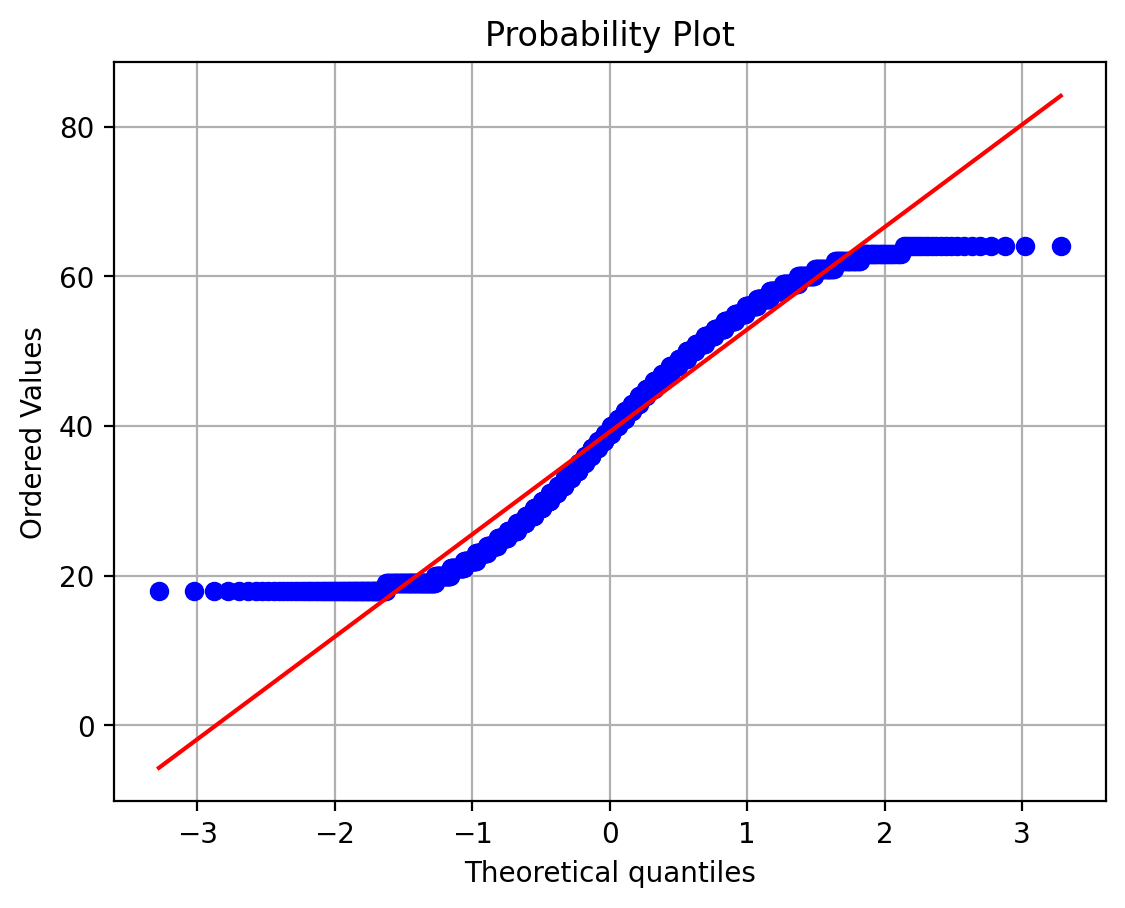

In [14]:
# 1.QQ plot
from scipy import stats
stats.probplot(data['age'], dist='norm', plot = plt)
plt.grid();

#### Observation:
* In the above QQ plot you can observe that all the data points are not falling on the line, Hence we can say that `age` feature is not following the normal distribution

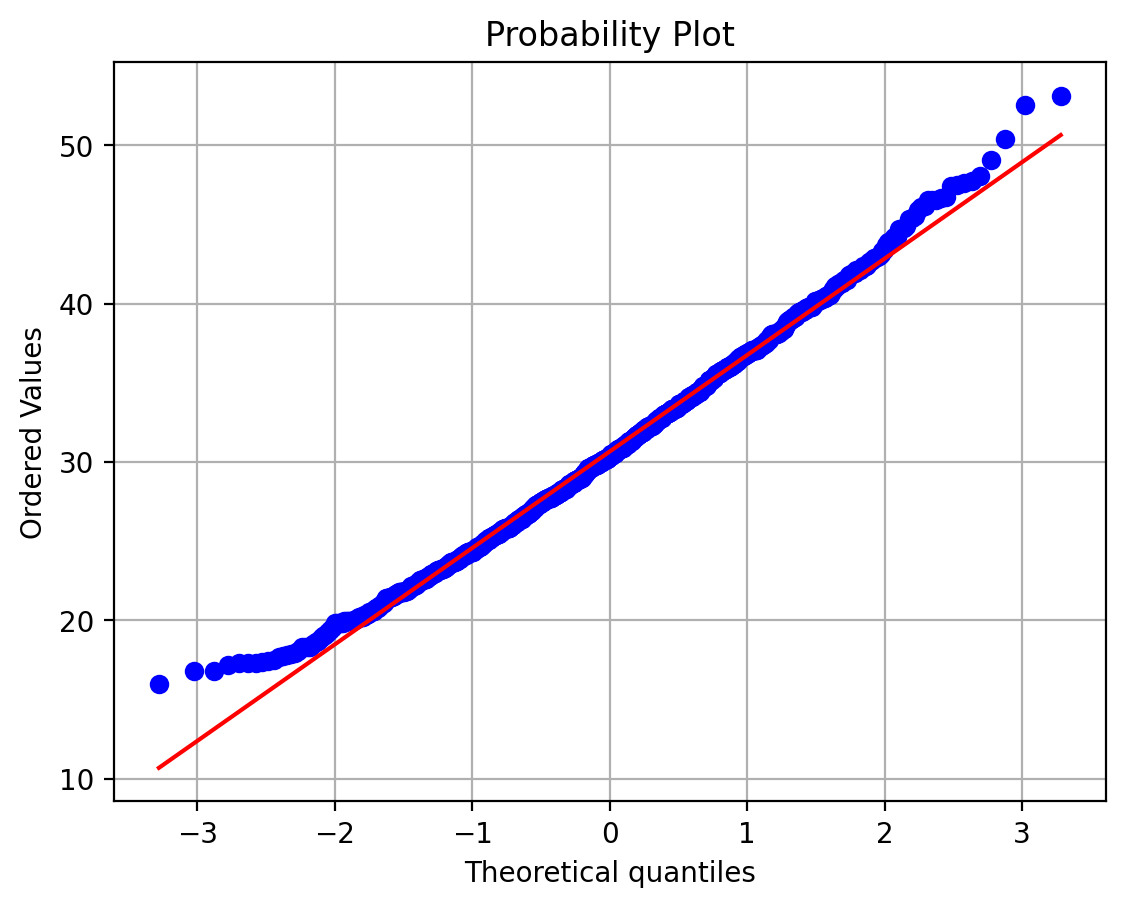

In [15]:
# 1.QQ plot
from scipy import stats
stats.probplot(data['bmi'], dist='norm', plot = plt)
plt.grid();

#### Observation:
* In the above QQ plot you can observe that almost all the data points are falling on the line, Hence we can say that `bmi` feature is following the normal distribution

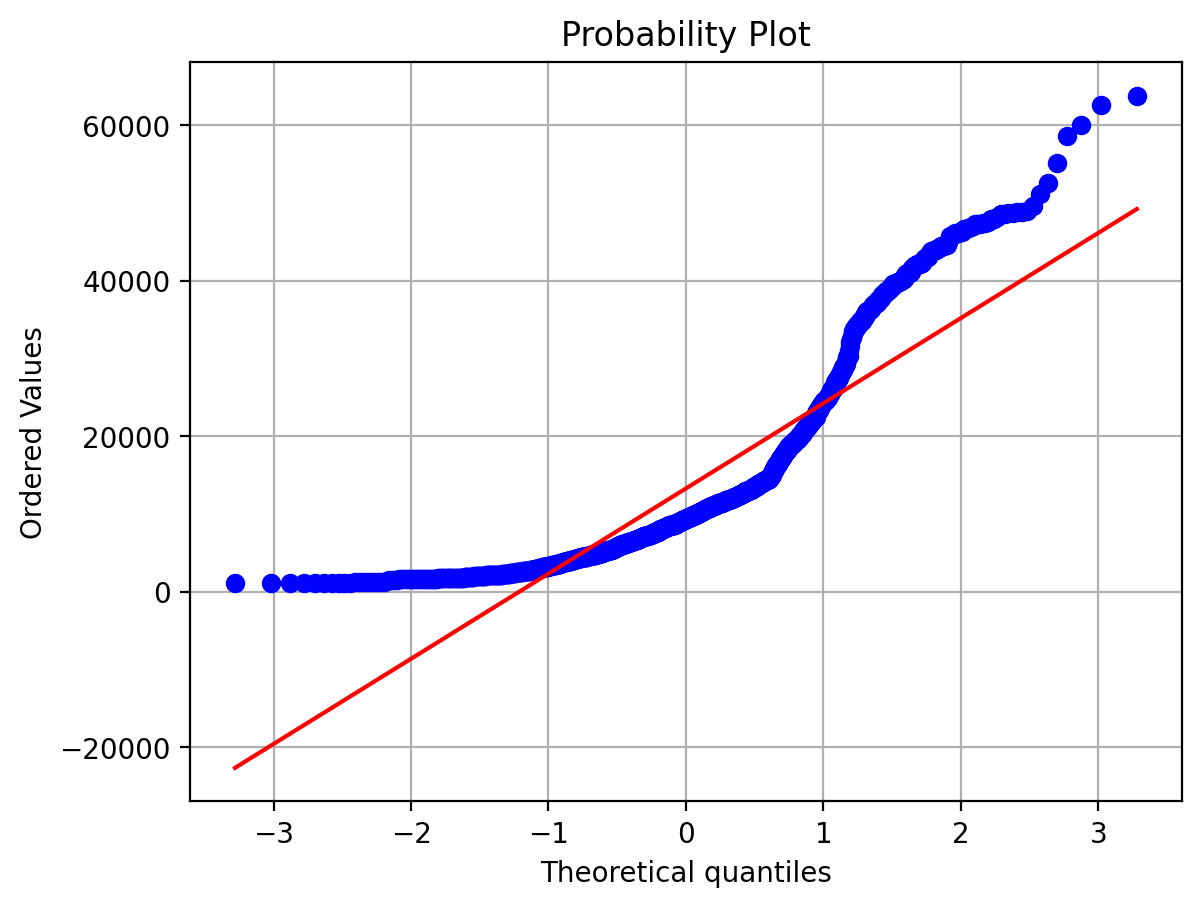

In [16]:
# 1.QQ plot
from scipy import stats
stats.probplot(data['charges'], dist='norm', plot = plt)
plt.grid();

#### Observation:
* In the above QQ plot you can observe that all the data points are not falling on the line, Hence we can say that `charges` feature is not following the normal distribution

### Check for Outliers

### Skewness:
**Skewness refers to a distortion or asymmetry that deviates from the symmetrical bell curve, or normal distribution, in a set of data. If the curve is shifted to the left or to the right, it is said to be skewed.**


* Less than -1 or greater than 1, then the distribution is highly skewed.
* Between -1 and -0.5 or 0.5 and 1, then the distribution is moderately skewed.
* Between -0.5 and 0.5, then the distribution is approx. symmetric.
* When skewness = 0, then the data is perfrctly symmetric.

In [17]:
# check for the Skewness to see if there are any presence of outliers:
data.skew()

age         0.054781
bmi         0.283914
children    0.937421
charges     1.515391
dtype: float64

#### Observatios:
* From the Skewness it is clear that feature charges is having a skewness of 1.51 hence it is clear that it has outliers

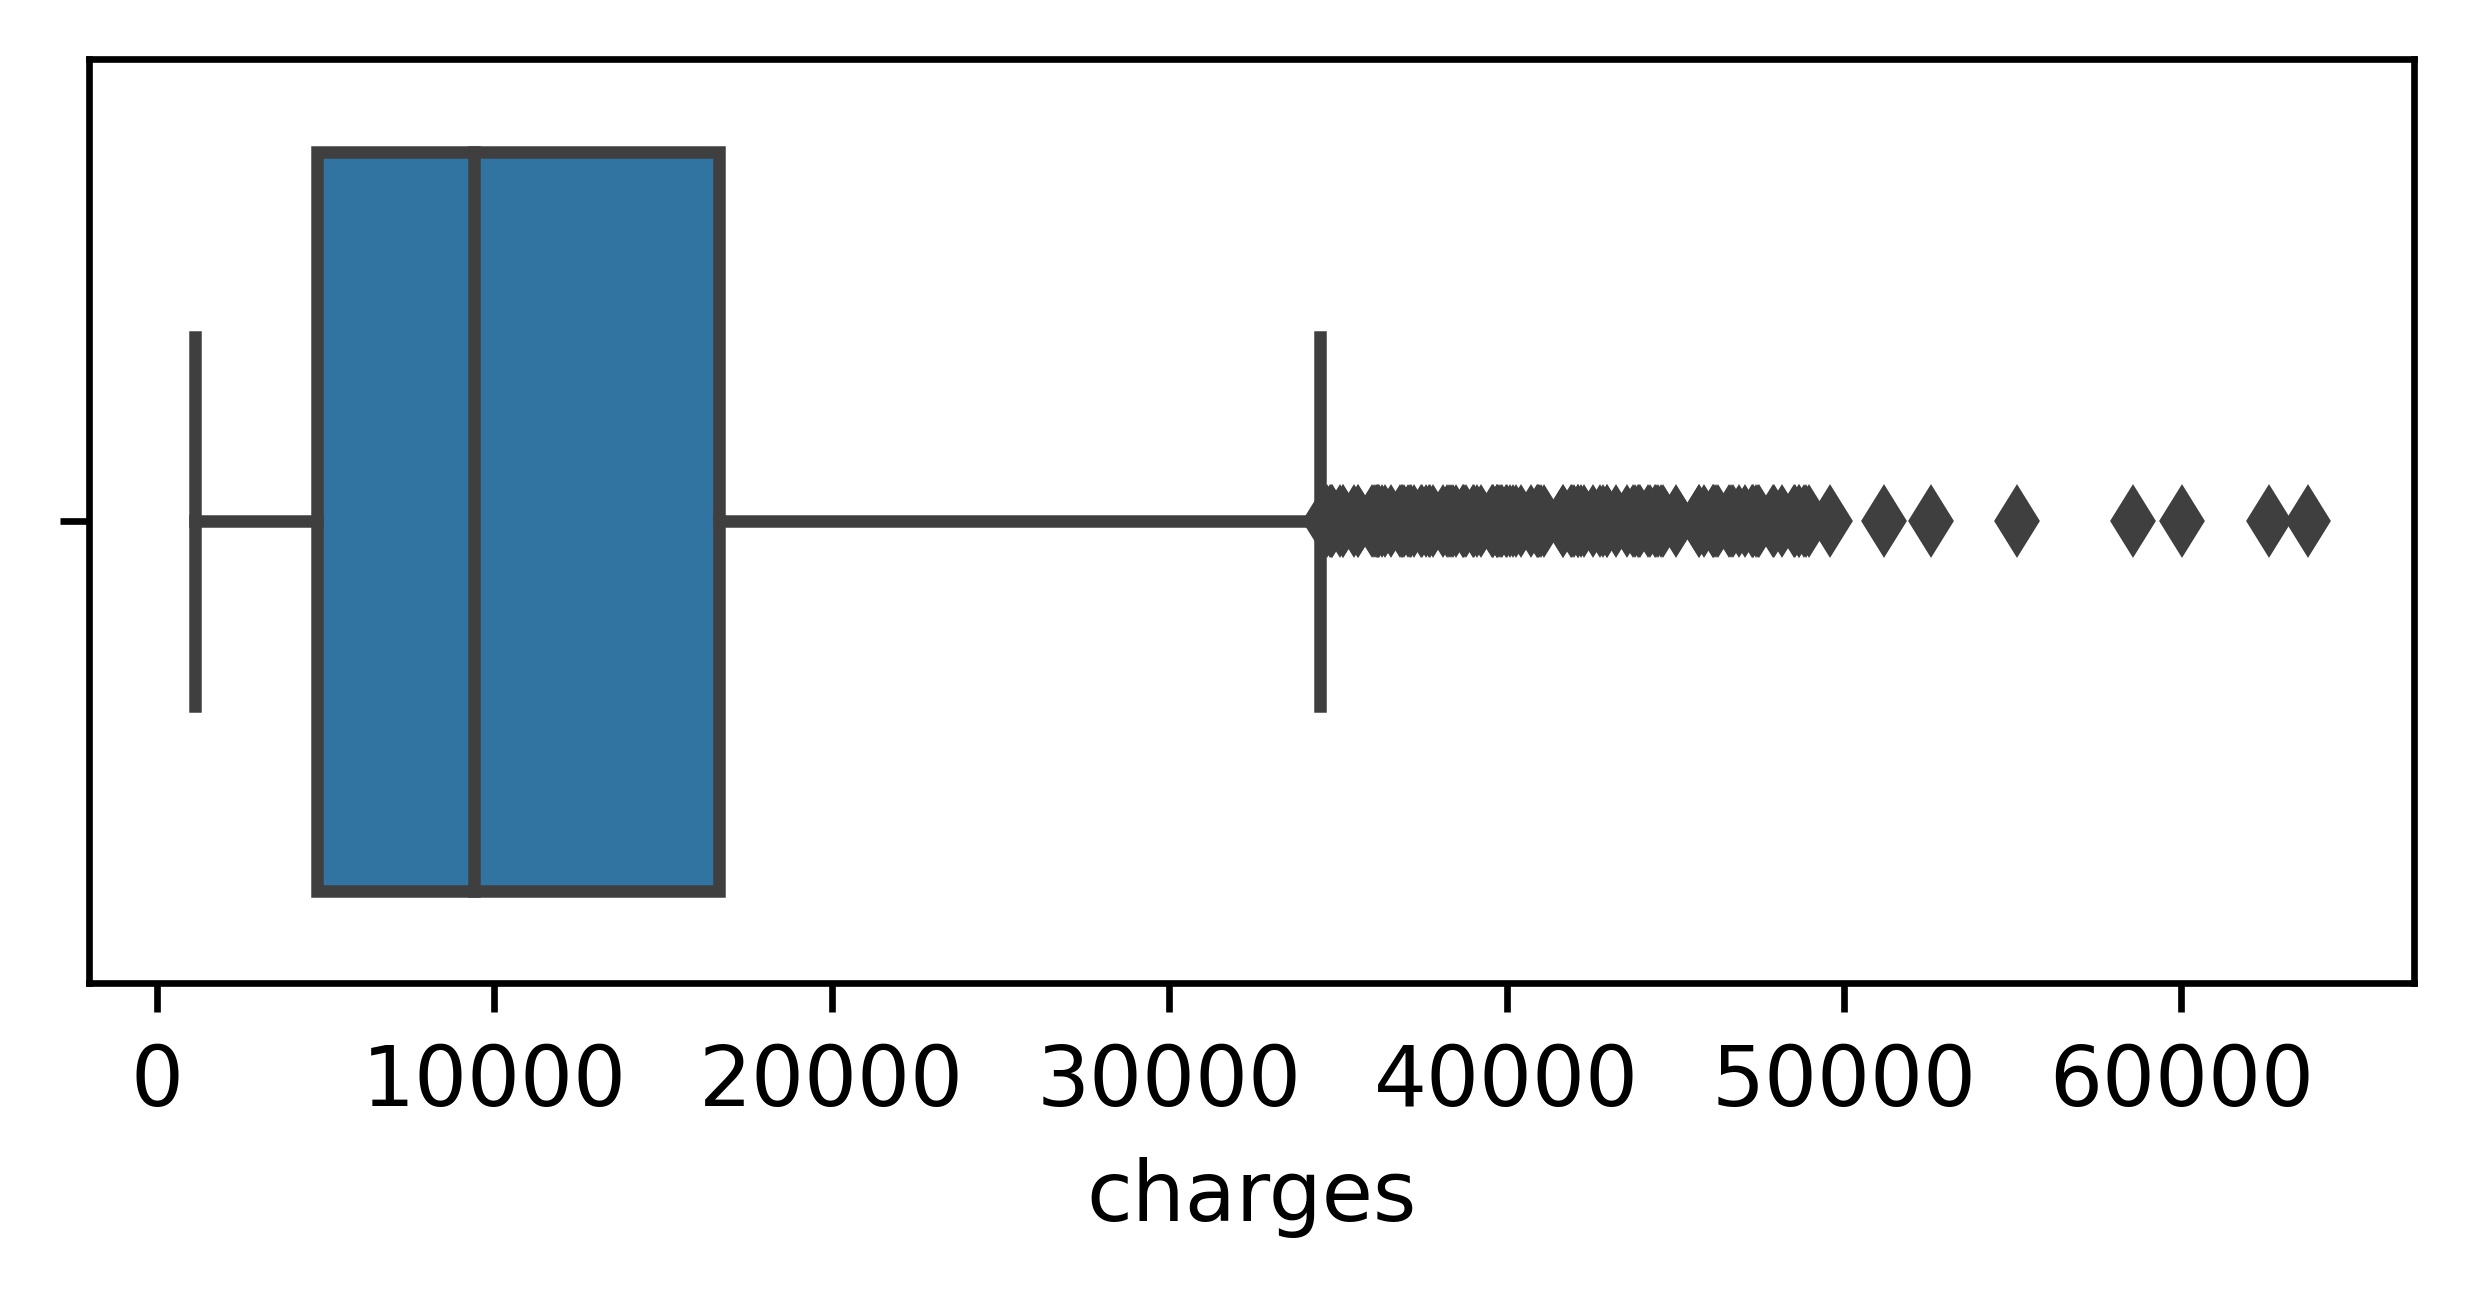

In [18]:
plt.figure(figsize=(5,2), dpi = 300)
sns.boxplot(x= 'charges', data=data);

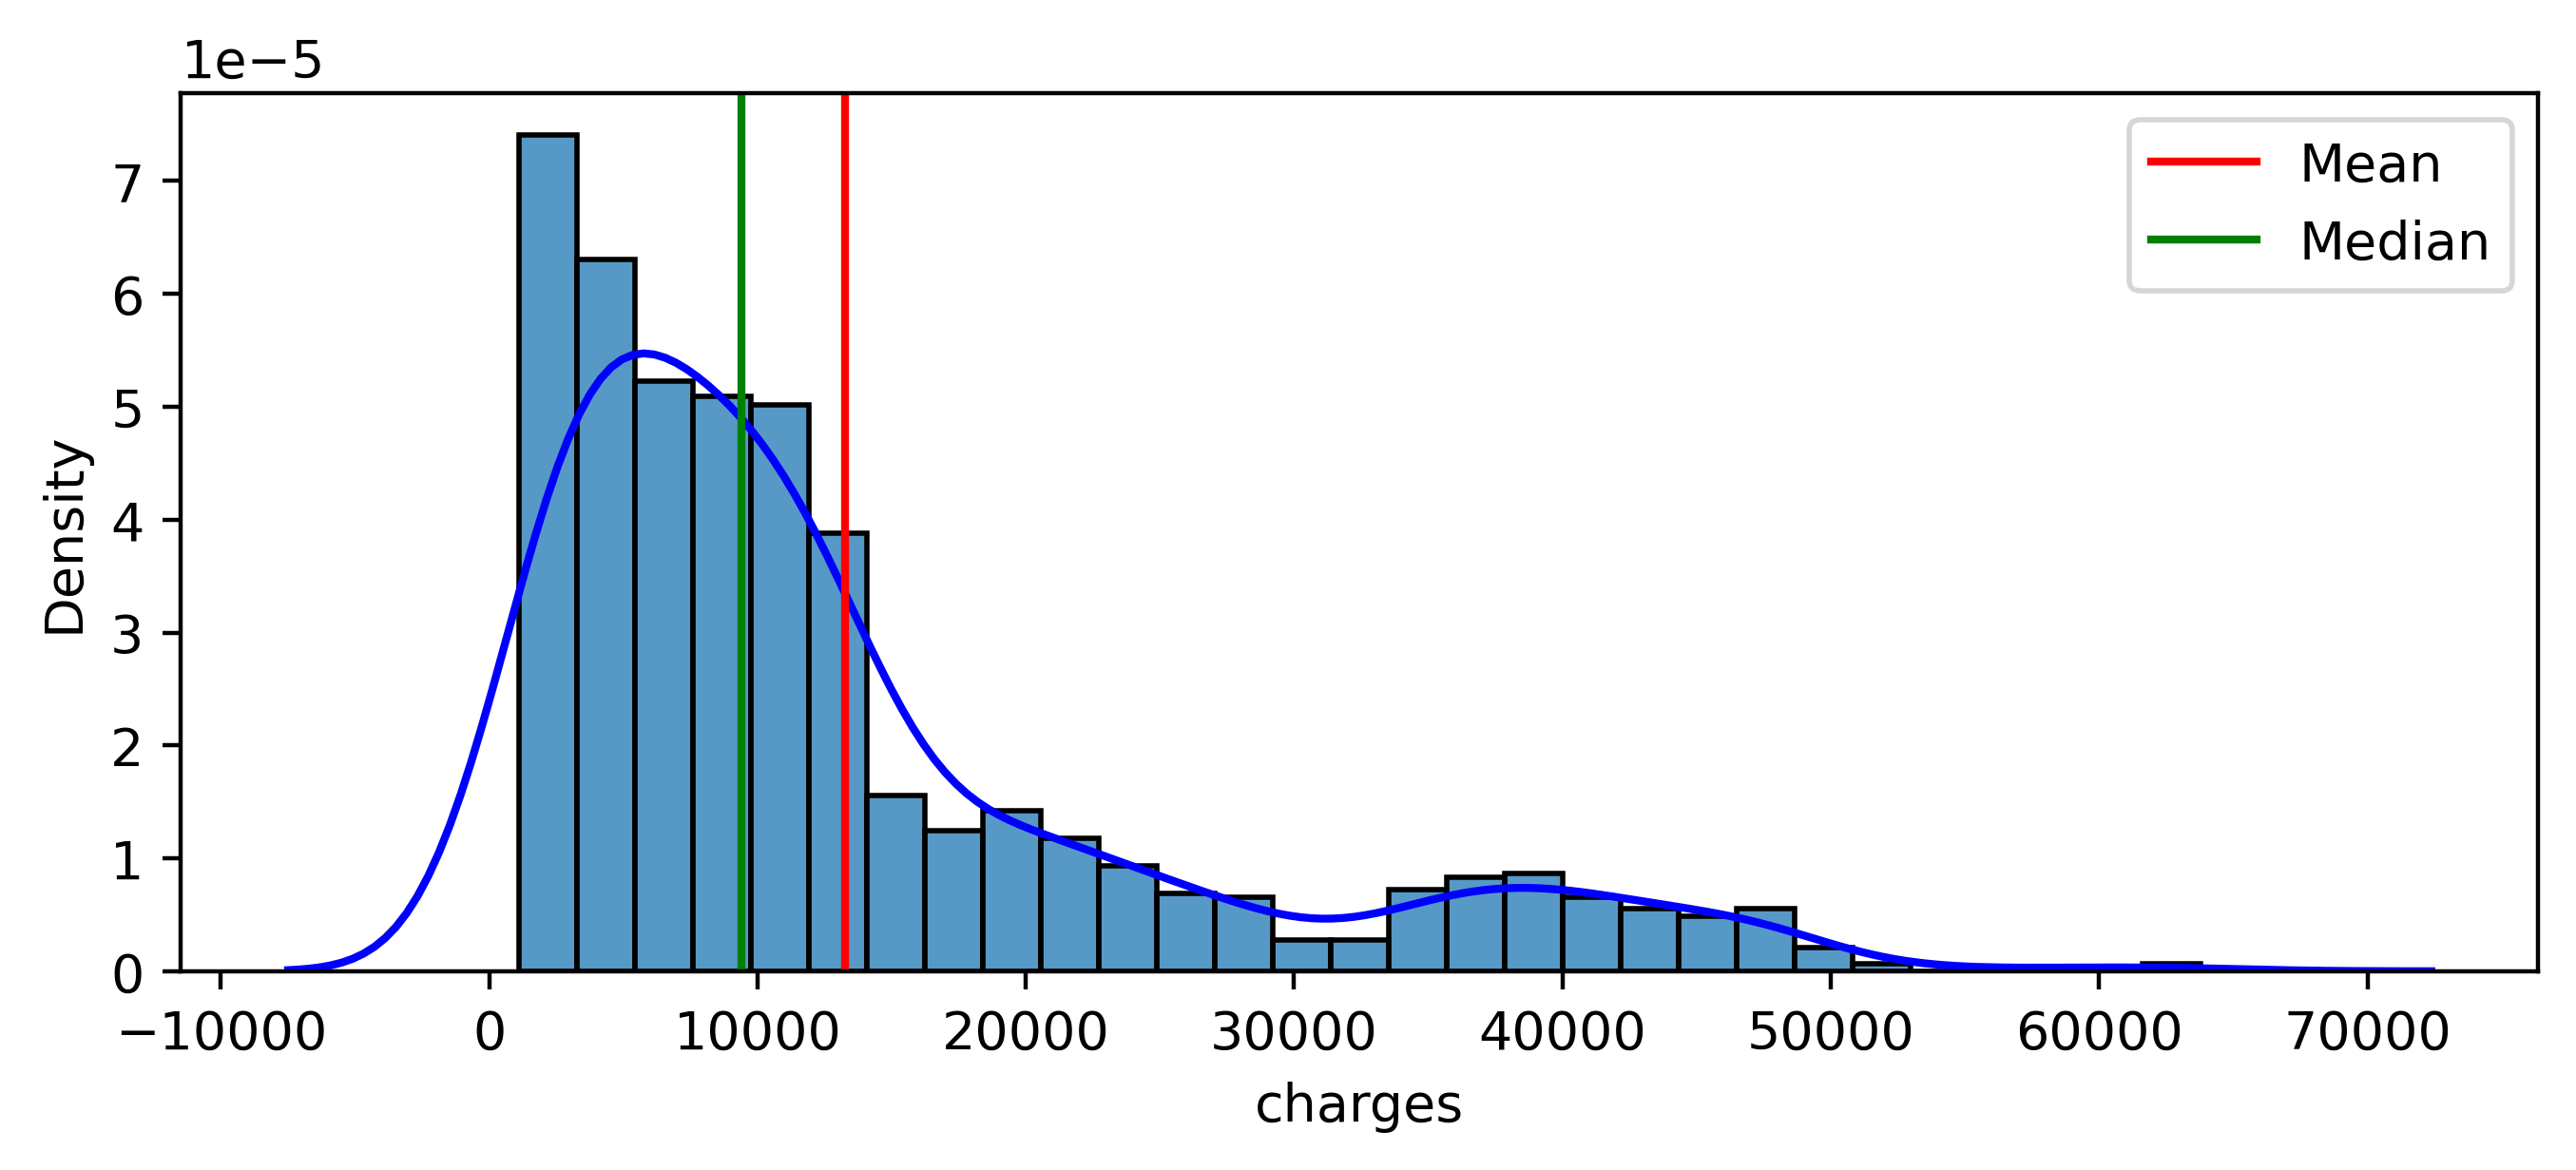

In [19]:
plt.figure(figsize=(8,3),dpi = 200)
sns.histplot(data.charges,stat = 'density')
sns.kdeplot(data.charges, color = 'blue')
plt.axvline(data.charges.mean(), color = 'red', label = 'Mean')
plt.axvline(data.charges.median(), color = 'green', label = 'Median')
plt.legend();
# As we can observe the distribution is spread towards the positive side, Hence we have positive Skewness.

### Outliers detection and Viewing

### IQR Method

In [20]:
import scipy.stats as stats

Q1, Q2, Q3 = tuple(data.charges.quantile(q = [0.20,0.50,0.80]).values)

print(Q1, Q2, Q3)

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1-1.5*IQR

print(IQR, UL, LL)


data[(data.charges > UL) | (data.charges < LL)]

3996.42674 9386.1613 20269.216957999997
16272.790217999998 44678.402285 -20412.758587


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
39,60,male,39.900,0,yes,southwest,48173.36100
55,58,male,36.955,2,yes,northwest,47496.49445
94,64,female,31.300,2,yes,southwest,47291.05500
109,63,male,35.090,0,yes,southeast,47055.53210
175,63,female,37.700,0,yes,southwest,48824.45000
251,63,female,32.200,2,yes,southwest,47305.30500
265,46,male,42.350,3,yes,southeast,46151.12450
281,54,male,40.565,3,yes,northeast,48549.17835
288,59,female,36.765,1,yes,northeast,47896.79135


## Bi-Variate ANalysis

In [21]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

### Checking the relationship between two features through VIZ

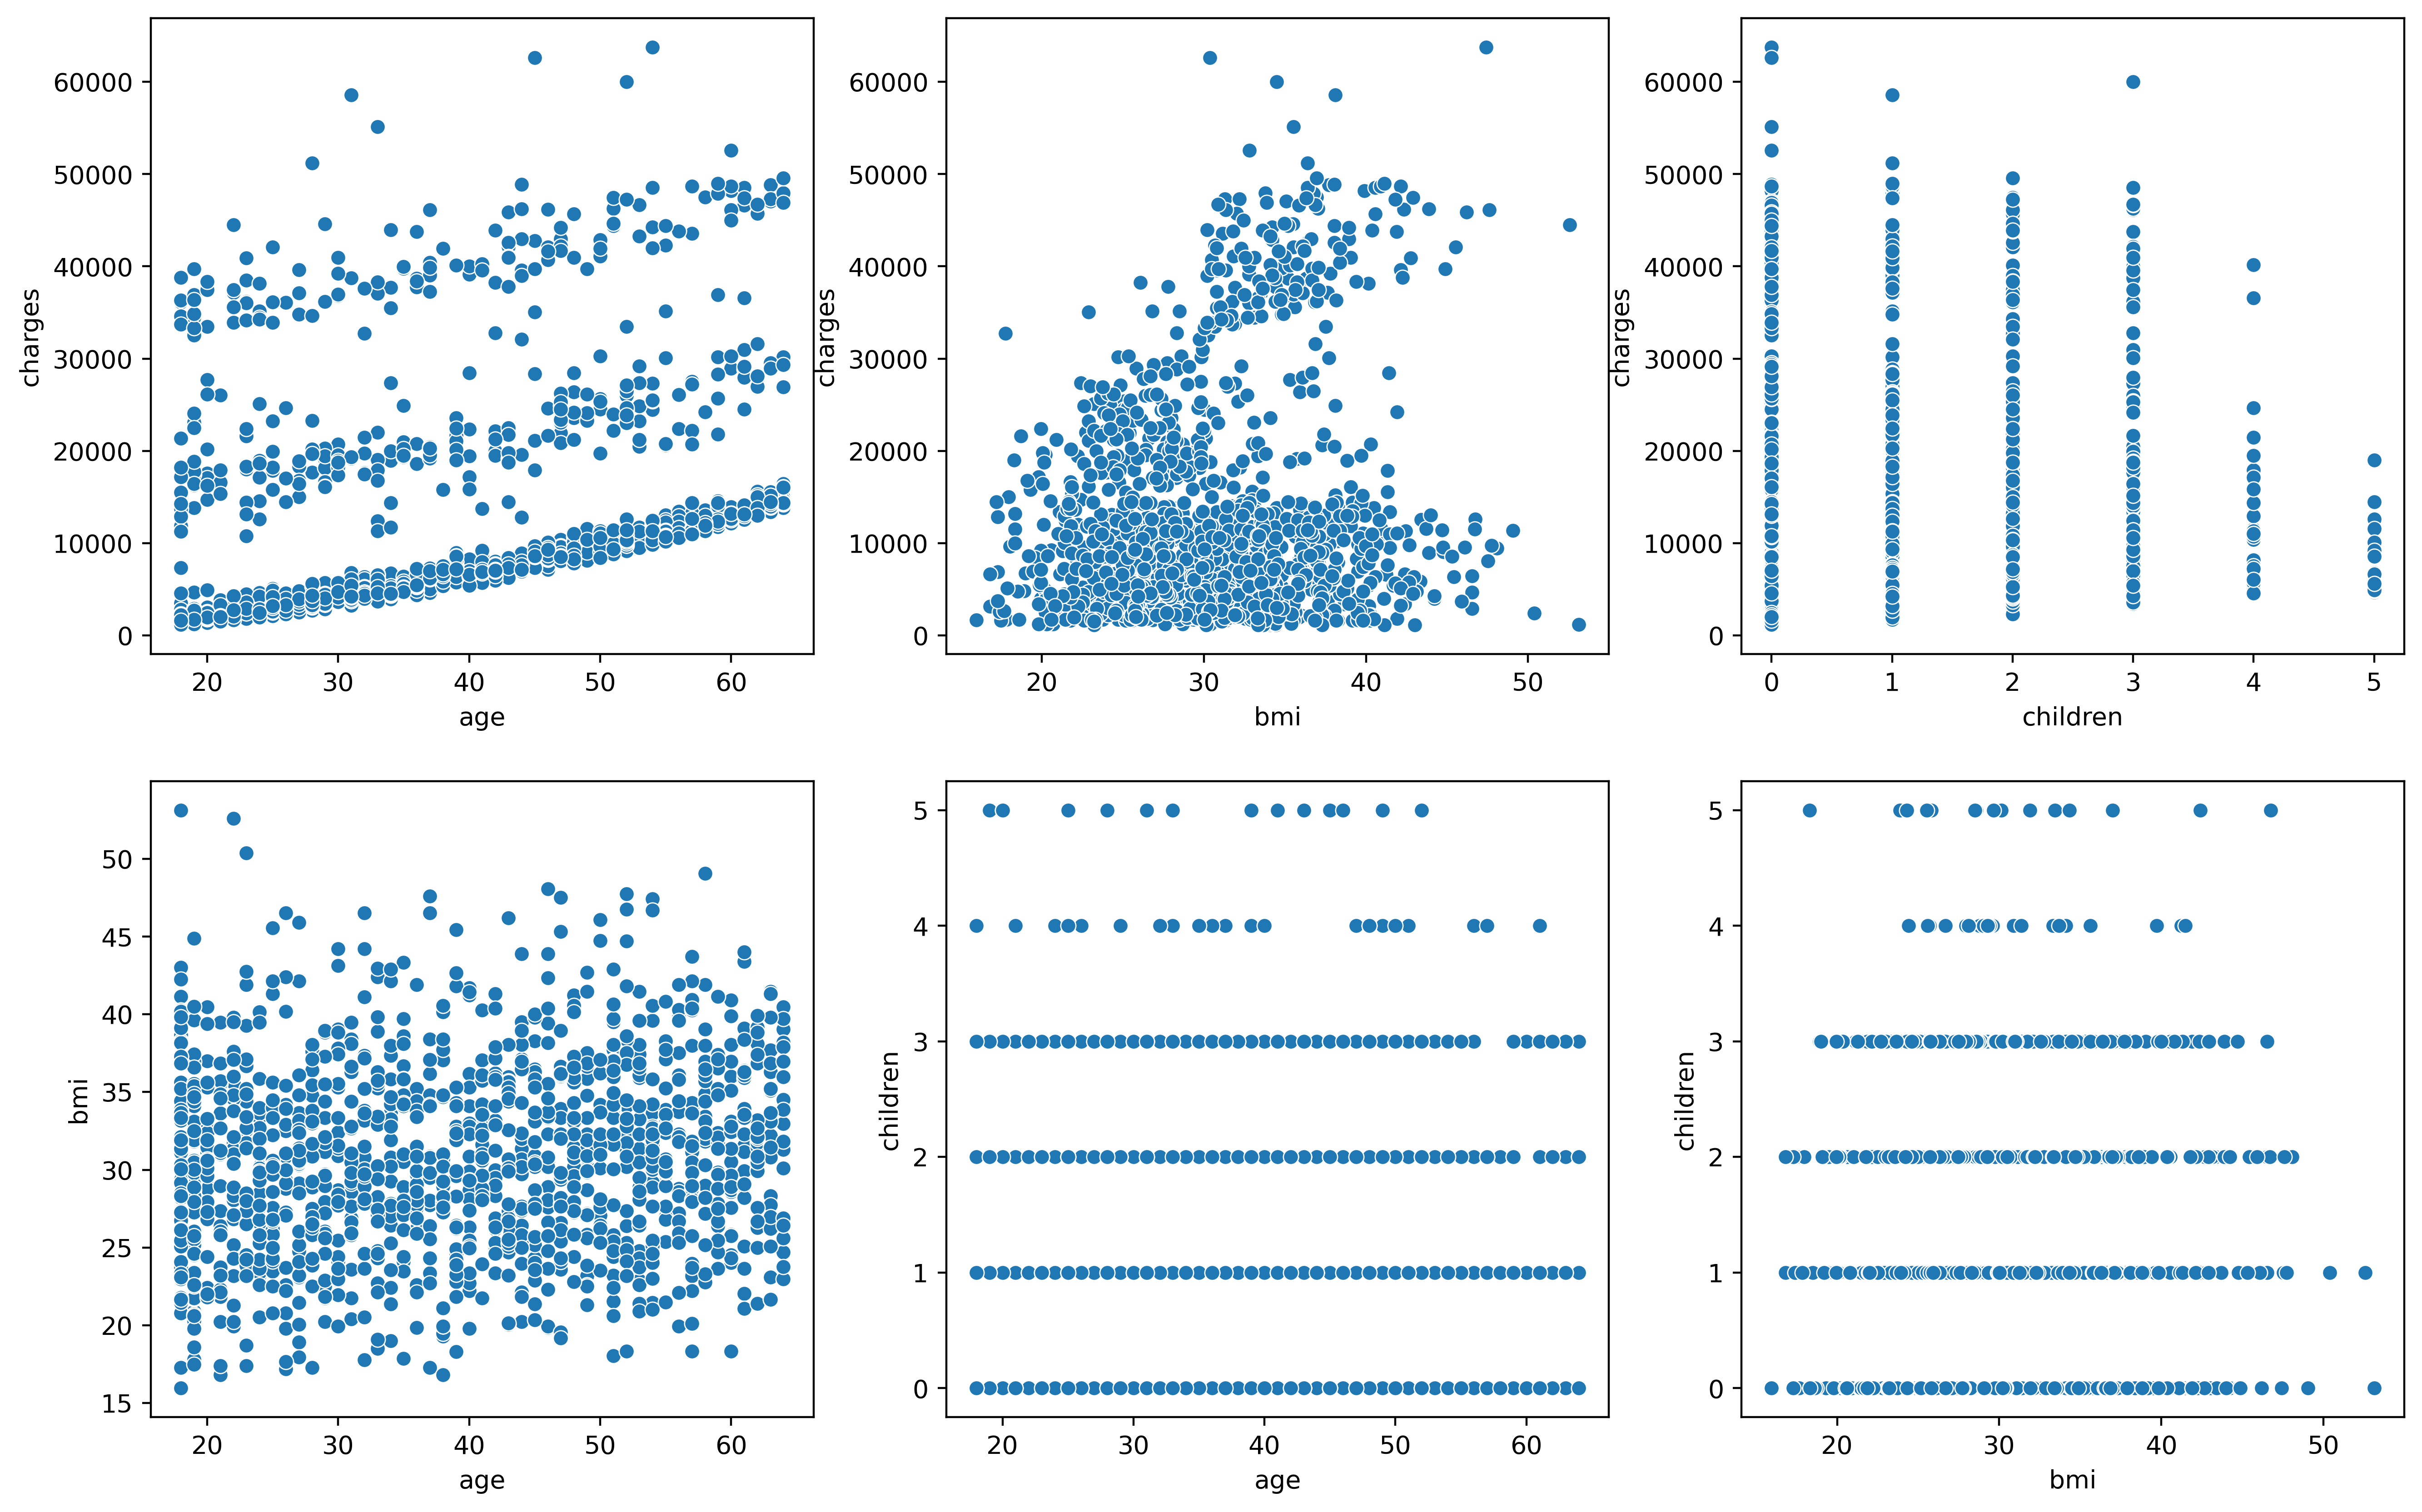

In [23]:
plt.figure(figsize=(16,10), dpi = 200)
plt.subplot(231)
sns.scatterplot(data = data, x ='age', y = 'charges')
plt.subplot(232)
sns.scatterplot(data =data, x = 'bmi', y = 'charges')
plt.subplot(233)
sns.scatterplot(data =data, x = 'children', y = 'charges')
plt.subplot(234)
sns.scatterplot(data =data, x = 'age', y = 'bmi')
plt.subplot(235)
sns.scatterplot(data =data, x = 'age', y = 'children')
plt.subplot(236)
sns.scatterplot(data =data, x = 'bmi', y = 'children');

### Pearson's Correlation Coefficient

* Tests whether the two samples have a linear relationship or not

### Assumptions:
* Observations in each feature are independent and identical
* Observations in each feature are normally distributed
* Observatins in each feature have the same varience

In [24]:
def pearson(feature1, feature2):
    stat, p = stats.pearsonr(feature1, feature2)
    print('stat = %.3f, p = %.3f'%(stat,p))
    if p>0.03:
        print('The two features are independent')
    else: 
        print('The two features are dependent on each other')

In [25]:
pearson(data.age, data.charges)

stat = 0.298, p = 0.000
The two features are dependent on each other


In [26]:
pearson(data.bmi, data.charges)

stat = 0.198, p = 0.000
The two features are dependent on each other


In [27]:
pearson(data.children, data.charges)

stat = 0.067, p = 0.014
The two features are dependent on each other


In [28]:
pearson(data.age, data.bmi)

stat = 0.109, p = 0.000
The two features are dependent on each other


In [29]:
pearson(data.age, data.children)

stat = 0.042, p = 0.129
The two features are independent


In [30]:
pearson(data.bmi, data.children)

stat = 0.013, p = 0.641
The two features are independent


### Observationas:
* Features age and charges are having linear relationship , you can also find the same from the scatterplot above.
* Features bmi and charges are having linear relationship , you can also find the same from the scatterplot above.
* Features age and bmi are having linear relationship , you can also find the same from the scatterplot above.
* Features age and children , bmi and children are not having any linear relationship , thats a good thing because all the input features should be independent of each other.
* we cannot consider the feature children to compare it with any other feature cause it always results the same form of distribution , its not a valid option to do so.

### NOTE:
* The features age and bmi are dependent on each other , we have get rid of one of the features cause all our input features should be independent of each other.

# Step 2 :Identify the following: 
1. Identify the input and output/target variables. 
2. Identify the type of ML Task.
3. Identify the Evaluation Metric.


### 1. Identify and segregate the input and output/target variables.
- Input Target Variables: `sex, children, smoker, region, age`
- Output Target Variable: `charges_trns`

In [31]:
y=data['charges']
X=data[['age','sex', 'bmi', 'children','smoker']] 

### 2. Identify the type of ML Task.
* As we can observe that the target variable is given in the historical data, Hence this is a `Supervised Learning`.
* `y` belongs to **Real valued** feature(`continous Numerical`)

- ML Task: **`Regression`** 


### 3. Identify the Evaluation Metric.
* For Regression ML Task the following Evaluation metrics can be used:
    1. **Mean Squared Error**
    2. **Root Mean Squared Error**
    3. **Mean Absolute Error**
    4. **R^2 (Coefficient of Determinate)**
    5. **Adjusted R^2**

# Step 3
## a) : Split the dataset into Training and Testing (recommended 75:25 split).

In [32]:
# splitting the historical data into train and test.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=27)

In [33]:
X_train.head()

,age,sex,bmi,children,smoker
1166,29,female,24.600,2,no
643,43,male,35.310,2,no
103,61,female,29.920,3,yes
530,57,male,42.130,1,yes
1270,25,female,34.485,0,no


In [34]:
y_train.head()

1166     4529.47700
643     18806.14547
103     30942.19180
530     48675.51770
1270     3021.80915
Name: charges, dtype: float64

In [35]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(935, 5) (935,)
(402, 5) (402,)


## b) : Separating Categorical and Numerical Columns for both Train and Test data:

In [36]:
X_train.dtypes # viewing the datatypes to seperate them

age           int64
sex          object
bmi         float64
children      int64
smoker       object
dtype: object

In [37]:
X_train_categorical = X_train.select_dtypes(include = ['object']) # segregating the object feature 

In [38]:
X_train_categorical.head()

,sex,smoker
1166,female,no
643,male,no
103,female,yes
530,male,yes
1270,female,no


In [39]:
X_train_numerical = X_train.select_dtypes(include = ['int64', 'float64']) # segregating the Numerical feature

In [40]:
X_train_numerical.head()

,age,bmi,children
1166,29,24.600,2
643,43,35.310,2
103,61,29.920,3
530,57,42.130,1
1270,25,34.485,0


In [41]:
X_test_categorical = X_test.select_dtypes(include = ['object'])

In [42]:
X_test_categorical.head()

,sex,smoker
182,male,no
571,female,no
1136,female,no
779,male,yes
1006,male,yes


In [43]:
X_test_numerical = X_test.select_dtypes(include = ['int64', 'float64'])

In [44]:
X_test_numerical.head()

,age,bmi,children
182,22,19.950,3
571,18,37.290,1
1136,26,22.230,0
779,30,24.400,3
1006,47,28.215,3


# Step 4 : Data preparation on train data:

- **For Numerical Variables - `Standardization` or `Normalization` (Fit and
Transform)**

In [45]:
# scaling the numerical features on the Training Data
from sklearn.preprocessing import StandardScaler

Std_scaler = StandardScaler()

# feature names will be (annoyingly) lost after Scaling the data
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_numerical_trns = pd.DataFrame(Std_scaler.fit_transform(X_train_numerical),
                                     columns = X_train_numerical.columns,
                                     index = X_train_numerical.index)
X_train_numerical_trns.head()

,age,bmi,children
1166,-0.742851,-1.001305,0.765906
643,0.260442,0.721927,0.765906
103,1.550391,-0.145320,1.608402
530,1.263736,1.819260,-0.076591
1270,-1.029506,0.589185,-0.919087


In [46]:
X_train_numerical_trns.describe()

,age,bmi,children
count,9.350000e+02,9.350000e+02,9.350000e+02
mean,-9.499234e-17,3.087251e-16,8.359326e-17
std,1.000535e+00,1.000535e+00,1.000535e+00
min,-1.531153e+00,-2.391475e+00,-9.190868e-01
25%,-8.861785e-01,-7.273736e-01,-9.190868e-01
50%,-2.621286e-02,-5.280336e-02,-7.659056e-02
75%,8.337528e-01,6.768749e-01,7.659056e-01
max,1.765382e+00,3.589152e+00,3.293394e+00


- **For Categorical - `LabelEncoding` or `OneHotEncoding` (Choose wisely)**

In [47]:
# Applying the OneHotEncoding on the categorical columns 

from sklearn.preprocessing import OneHotEncoder

encoder_ohe = OneHotEncoder(drop='first', sparse=False)

# feature names will be (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_ohe.fit_transform(X_train_categorical), 
                               columns=encoder_ohe.get_feature_names_out(X_train_categorical.columns), 
                               index = X_train_categorical.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes
1166,0.0,0.0
643,1.0,0.0
103,0.0,1.0
530,1.0,1.0
1270,0.0,0.0


# Step 5 :  Data preparation on test data:

- **For Numerical Variables - `Standardization` or `Normalization` (Fit and
Transform)**

In [48]:
import sklearn

print(sklearn.__version__)

1.2.0


In [49]:
X_test_numerical_trns = pd.DataFrame(Std_scaler.transform(X_test_numerical),
                                     columns = X_test_numerical.columns,
                                     index = X_test_numerical.index)
X_test_numerical_trns.head()

,age,bmi,children
182,-1.244497,-1.749486,1.608402
571,-1.531153,1.040507,-0.076591
1136,-0.957842,-1.382636,-0.919087
779,-0.671187,-1.033485,1.608402
1006,0.547098,-0.419654,1.608402


- **For Categorical - `LabelEncoding` or `OneHotEncoding` (Choose wisely)**

In [50]:
X_test_cat_ohe = pd.DataFrame(encoder_ohe.transform(X_test_categorical), 
                               columns=encoder_ohe.get_feature_names_out(X_test_categorical.columns), 
                               index = X_test_categorical.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes
182,1.0,0.0
571,0.0,0.0
1136,0.0,0.0
779,1.0,1.0
1006,1.0,1.0


In [51]:
X_train_transform = pd.concat([X_train_numerical_trns,X_train_cat_ohe], axis = 1)
X_train_transform.head()

,age,bmi,children,sex_male,smoker_yes
1166,-0.742851,-1.001305,0.765906,0.0,0.0
643,0.260442,0.721927,0.765906,1.0,0.0
103,1.550391,-0.145320,1.608402,0.0,1.0
530,1.263736,1.819260,-0.076591,1.0,1.0
1270,-1.029506,0.589185,-0.919087,0.0,0.0


In [52]:
X_test_transform = pd.concat([X_test_numerical_trns,X_test_cat_ohe], axis = 1)
X_test_transform.head()

,age,bmi,children,sex_male,smoker_yes
182,-1.244497,-1.749486,1.608402,1.0,0.0
571,-1.531153,1.040507,-0.076591,0.0,0.0
1136,-0.957842,-1.382636,-0.919087,0.0,0.0
779,-0.671187,-1.033485,1.608402,1.0,1.0
1006,0.547098,-0.419654,1.608402,1.0,1.0


## Model Building and Traning phase(with outliers)

In [53]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train_transform, y_train)

RandomForestRegressor()

## Residual Analysis on Training Data

In [54]:
y_train_pred = regressor.predict(X_train_transform)

In [55]:
# Adjusted R^2
def Adjusted_r2(y_train,y_train_pred,X_train_transform):
    from sklearn import metrics
    r2 = metrics.r2_score(y_train, y_train_pred)
    n = len(y_train)
    k = X_train_transform.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [56]:
Adjusted_r2(y_train,y_train_pred,X_train_transform)

0.9766928786232939

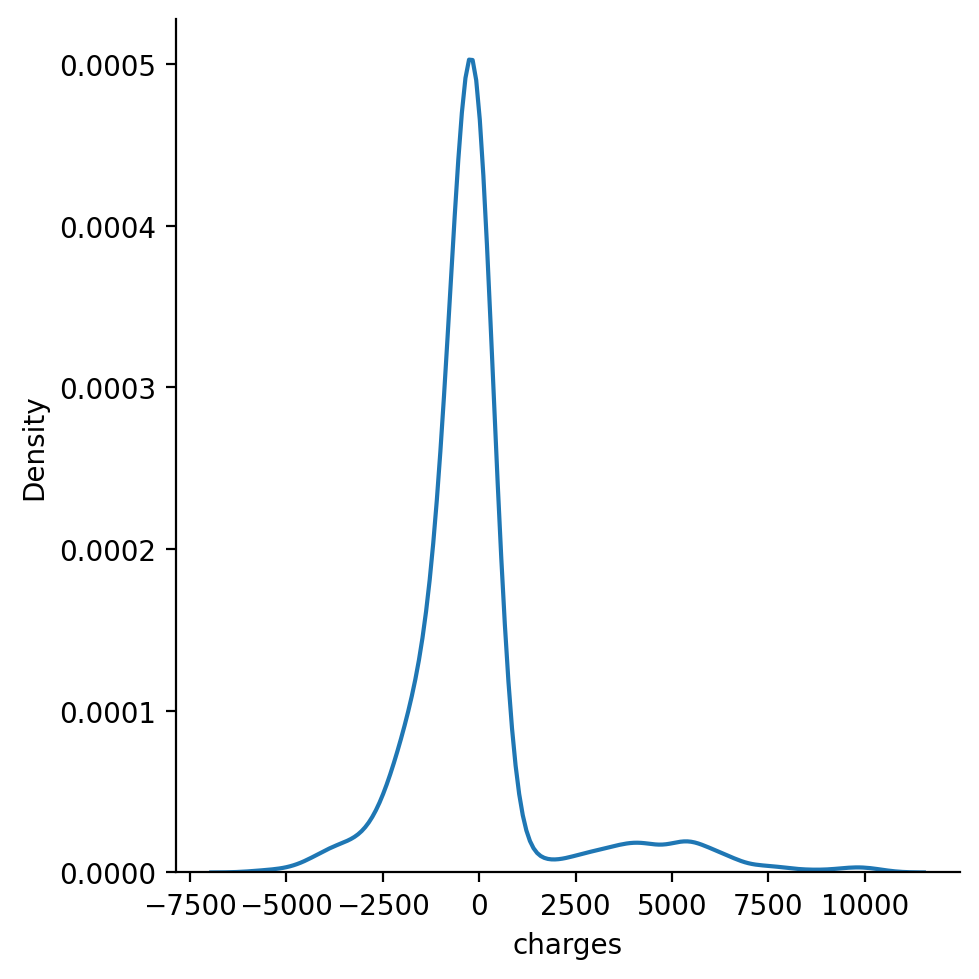

In [57]:
residual = y_train - y_train_pred

sns.displot(residual, kind='kde');

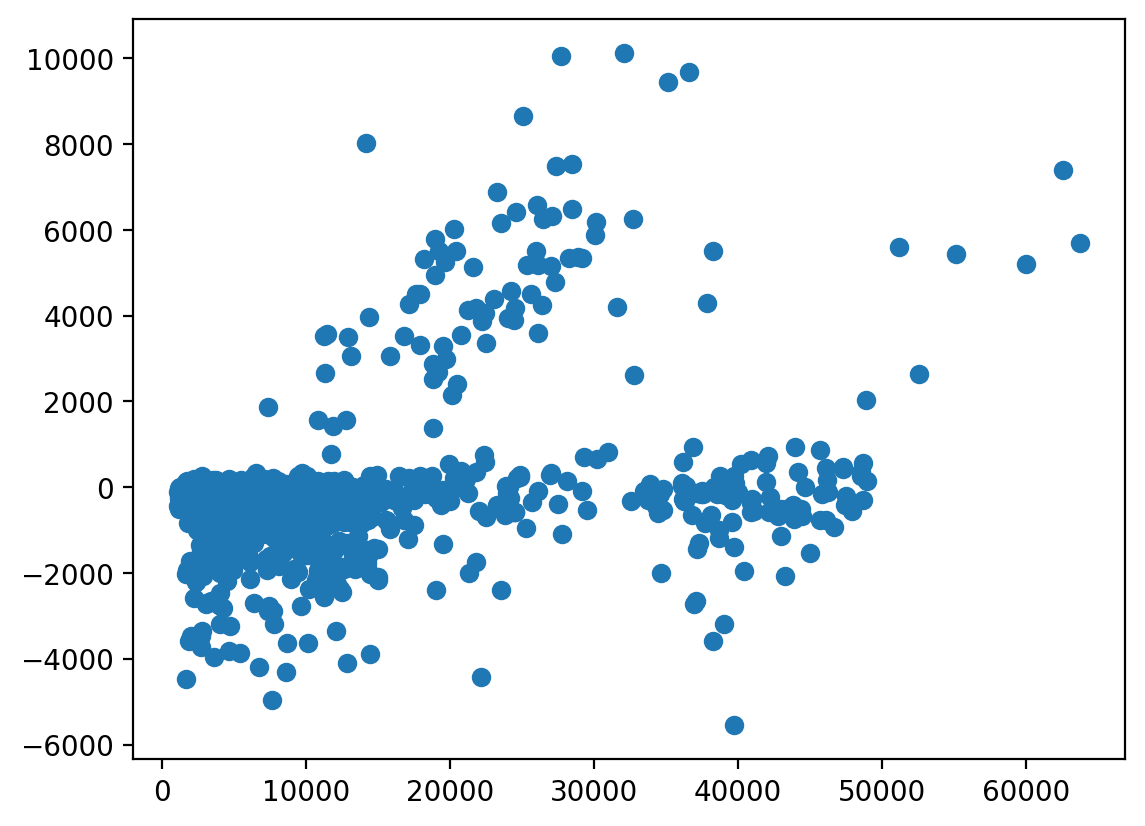

In [58]:
plt.scatter(y_train, residual)

plt.show();

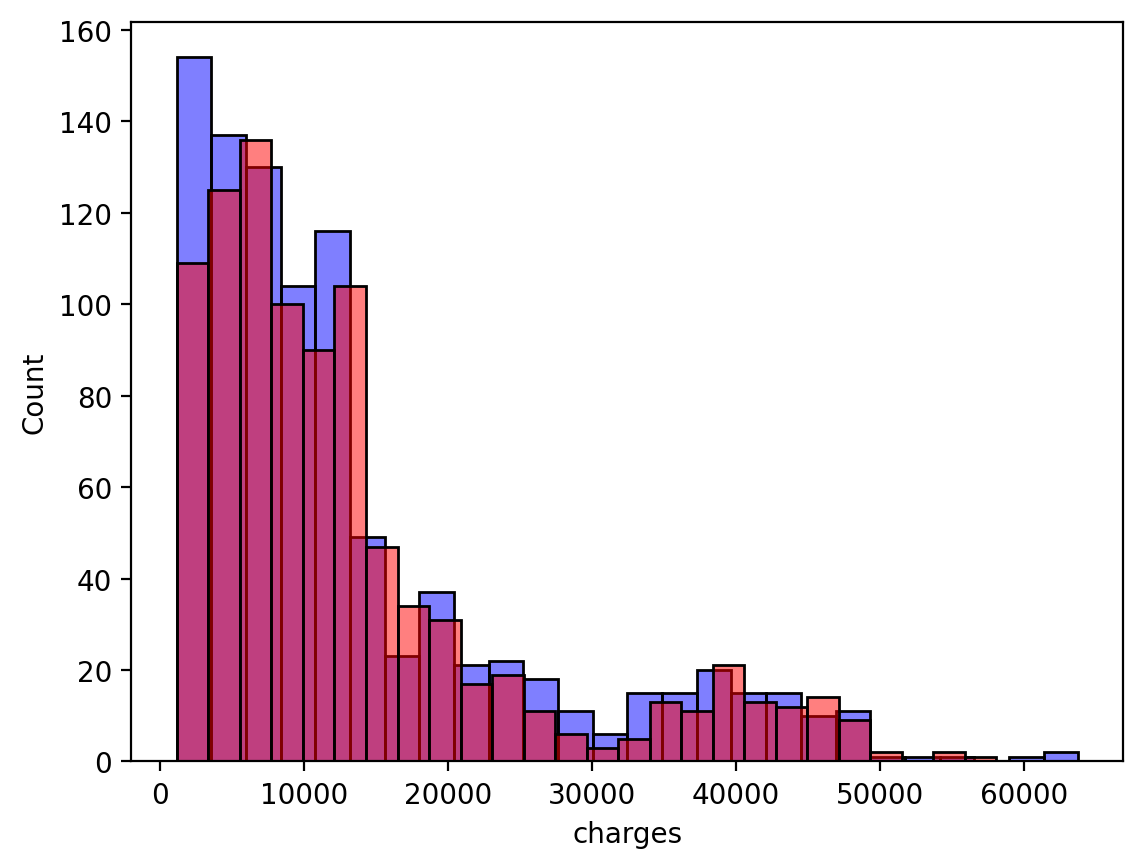

In [59]:
sns.histplot(y_train, color='blue', alpha=0.5)
sns.histplot(y_train_pred, color='red', alpha=0.5);

## Making Prediction

In [60]:
y_test_pred = regressor.predict(X_test_transform)

In [61]:
temp_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
temp_df

,Actual,Predicted
182,4005.42250,4451.879861
571,2219.44510,9497.910543
1136,3176.28770,5117.450144
779,18259.21600,19837.036893
1006,24915.22085,26949.332682
...,...,...
183,7419.47790,9932.065724
959,2730.10785,13578.552924
1203,18223.45120,17401.992043
1177,2899.48935,6964.032908


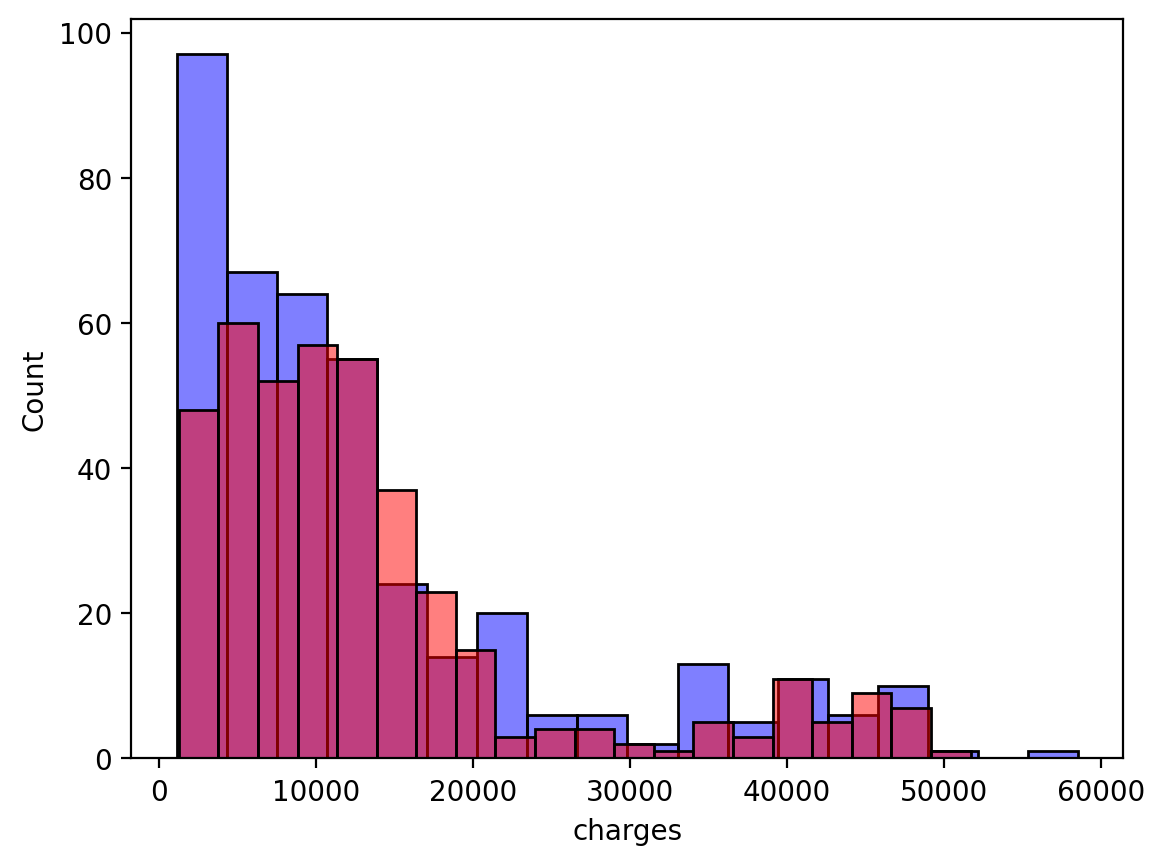

In [62]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red', alpha=0.5);

## Evaluation

In [63]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [64]:
Adjusted_r2(y_test,y_test_pred,X_test_transform)

0.8256442904188449

In [65]:
regressor.feature_importances_

array([0.13446208, 0.21010531, 0.02489592, 0.00652552, 0.62401117])

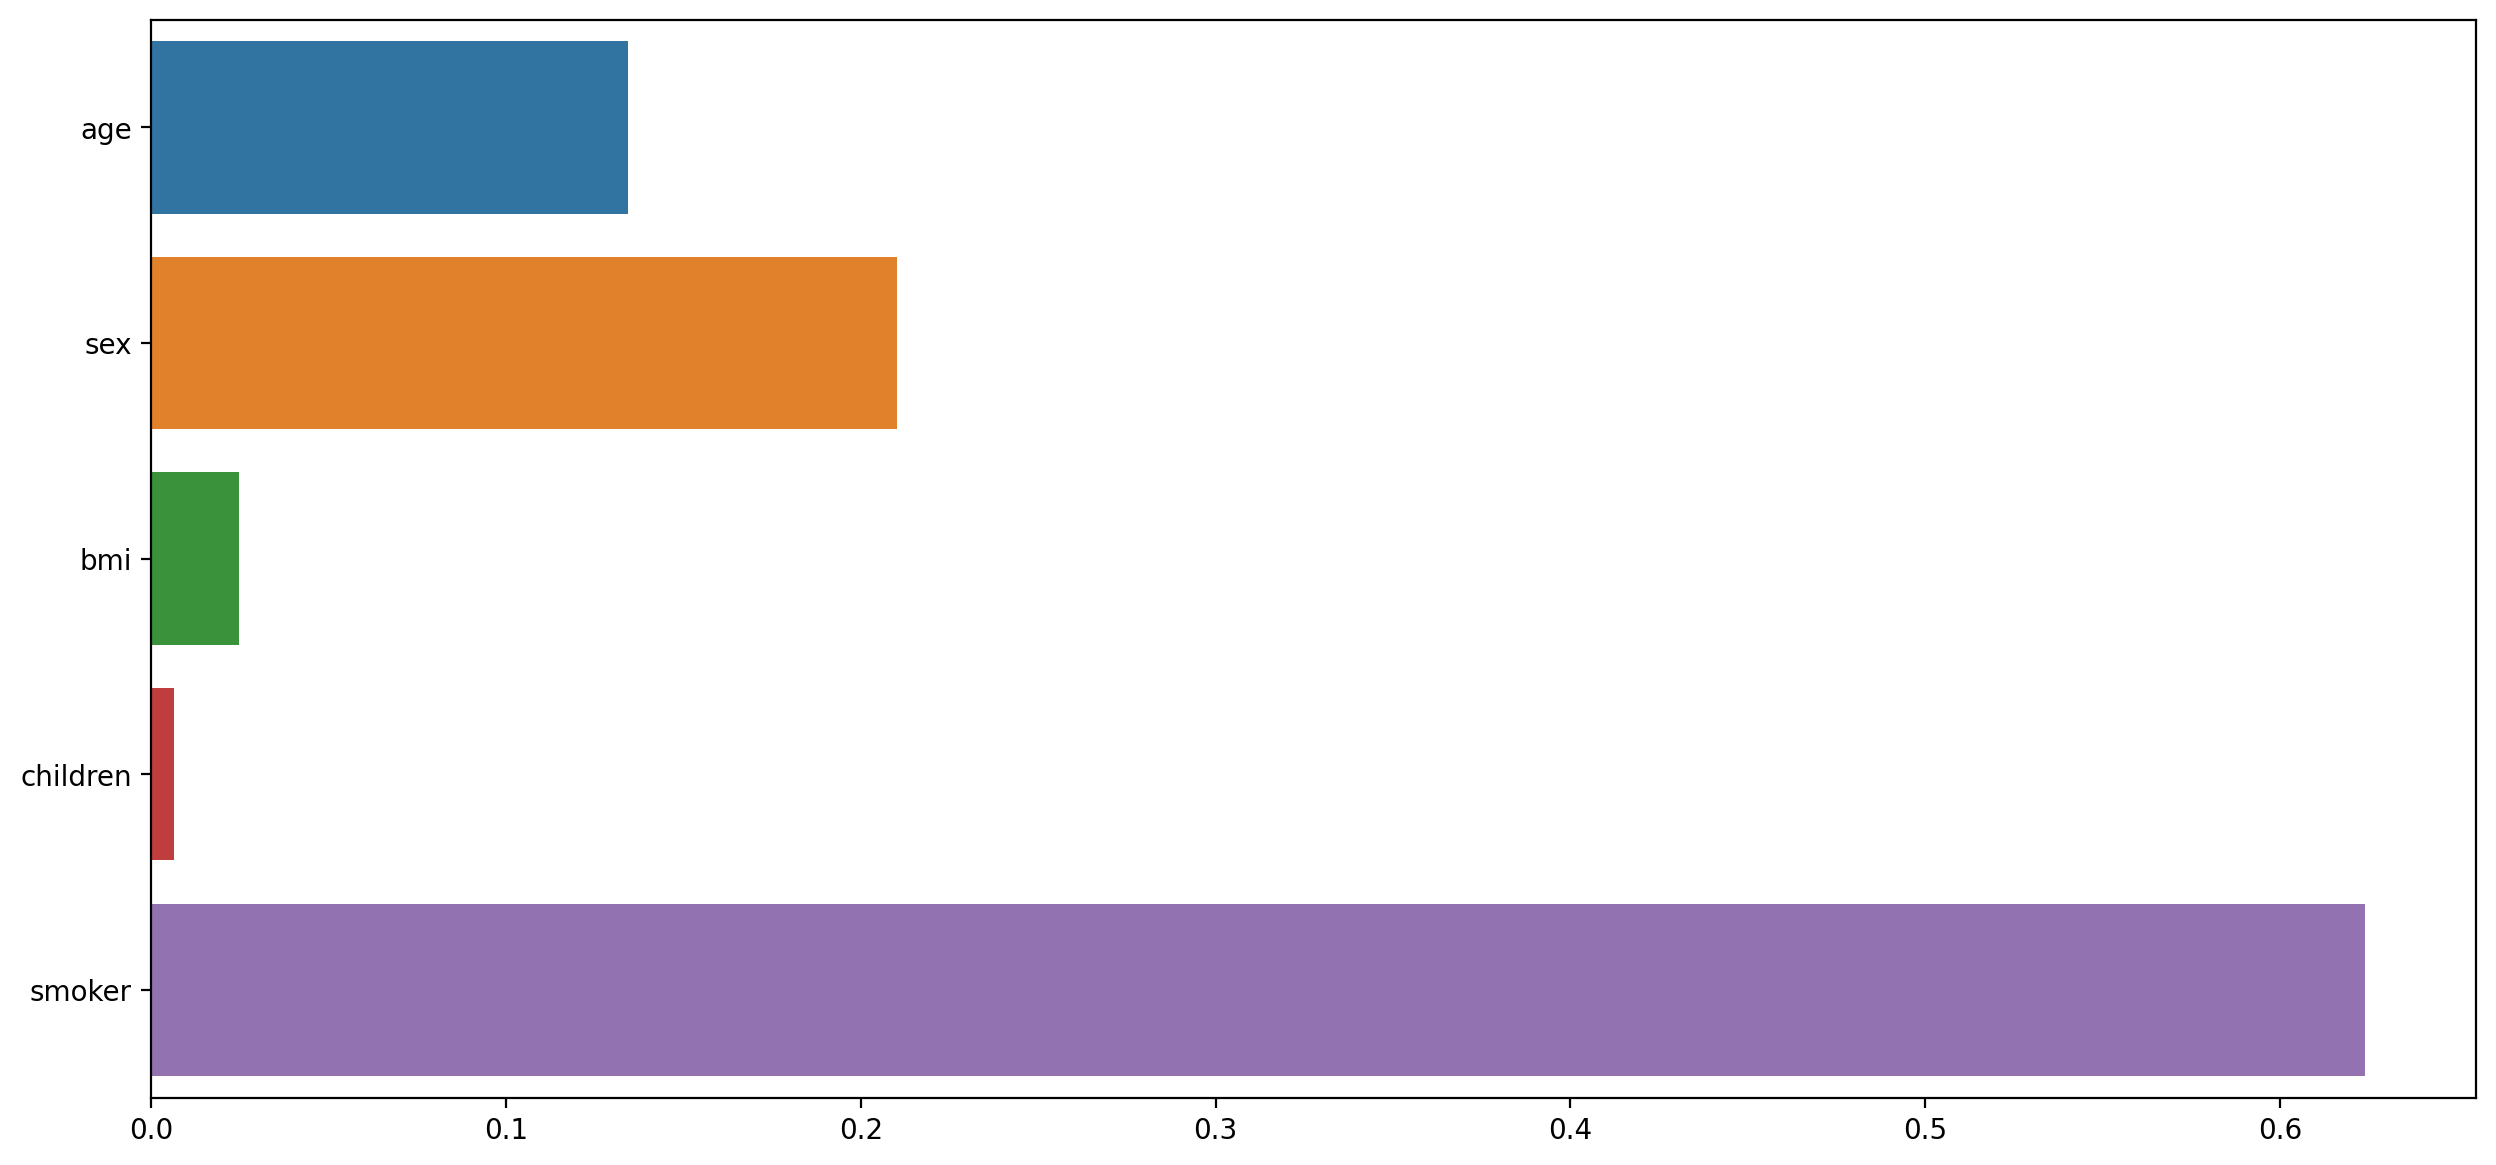

In [66]:
plt.figure(figsize=(15,7))
sns.barplot(x = regressor.feature_importances_, y = X_train.columns, )
plt.show();

# Observations:
- As we can say that, The Model Generated by `GradientBoostingRegressor` Algorithem is the best `Model` for Medical Cost Prediction problem.
- The Evaluation matric - r2_score of GBDT is  i.e., **`0.82`**, Thus it is clear that GBDT has the best performance.
- Using `feature_importances_` we came to know that features `bmi`,`children` are of least importance.
- This model is generated without removing the outliers

## FInding the best Hyperparameter By performing K-Fold Corss-Validation

In [67]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [68]:
tuned_parameters = [{'max_depth' : [1,2,3,4,5,6,7,8,9]}]

regressor_RF = GridSearchCV(
    estimator=RandomForestRegressor(), 
    param_grid=tuned_parameters, 
    scoring='r2',
    cv=5,
    return_train_score=True,
    verbose=1
)
regressor_RF.fit(X_train_transform, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}],
             return_train_score=True, scoring='r2', verbose=1)

In [69]:
print("Best parameters set found on train set")
print(regressor_RF.best_params_)
print(regressor_RF.best_estimator_)
print()

print('Score on Test Data: ', regressor_RF.score(X_test_transform, y_test))

Best parameters set found on train set
{'max_depth': 4}
RandomForestRegressor(max_depth=4)

Score on Test Data:  0.8544159976188151


## Applying Hyperparameter tunnig max_depth = 4

In [70]:
from sklearn.ensemble import RandomForestRegressor
RF_regressor = RandomForestRegressor(max_depth=4,random_state=27)
RF_regressor.fit(X_train_transform, y_train)

RandomForestRegressor(max_depth=4, random_state=27)

In [71]:
y_test_pred1 = regressor.predict(X_test_transform)

In [72]:
# Adjusted R^2
def Adjusted_r2(y_test,y_tes_pred1,X_test):
    from sklearn import metrics
    r2 = metrics.r2_score(y_test, y_test_pred1)
    n = len(y_test)
    k = X_test.shape[1]

    r2_adj = 1 - (1-r2)*(n-1)/(n-k-1)
    return r2_adj

In [73]:
Adjusted_r2(y_test,y_test_pred1,X_test_transform)

0.8256442904188449

In [76]:
from pickle import dump

In [77]:
dump(Std_scaler, open(r"D:\Btech project all\ML_Models\Std_scaler.pkl", 'wb'))
dump(encoder_ohe, open(r"D:\Btech project all\ML_Models\encoder_ohe.pkl", 'wb'))
dump(RF_regressor, open(r"D:\Btech project all\ML_Models\RF_regressor.pkl", 'wb'))